In [3]:
from icrawler.builtin import BingImageCrawler
import matplotlib.pyplot as plt
import os
from PIL import Image
import time
import logging

# Setup logging
logging.basicConfig(
    format='[%(asctime)s] %(levelname)s: %(message)s',
    level=logging.INFO
)


In [17]:
# Ensure output folder exists
def ensure_folder(path):
    os.makedirs(path, exist_ok=True)
    logging.info(f"Saving images to: {os.path.abspath(path)}")

# Custom polite crawler with delay
class FancyBingCrawler(BingImageCrawler):
    def __init__(self, *args, delay=20, **kwargs):
        super().__init__(*args, **kwargs)
        self.delay = delay

    def _get_image_urls(self, *args, **kwargs):
        for url in super()._get_image_urls(*args, **kwargs):
            logging.info(f"Fetching image URL: {url}")
            time.sleep(self.delay)
            yield url

In [19]:
# Configuration
keyword = 'onde-onde'
output_dir = f'images/{keyword.replace(" ", "_")}'
ensure_folder(output_dir)

[2025-04-25 11:46:05,044] INFO: Saving images to: /home/maguswyvern/Software/osyrion-caster/images/onde-onde


In [20]:
# Launch the polite crawler
crawler = FancyBingCrawler(storage={'root_dir': output_dir}, delay=2)
crawler.crawl(keyword=keyword, max_num=300)

[2025-04-25 11:46:05,435] INFO: start crawling...
[2025-04-25 11:46:05,435] INFO: starting 1 feeder threads...
[2025-04-25 11:46:05,437] INFO: starting 1 parser threads...
[2025-04-25 11:46:05,439] INFO: starting 1 downloader threads...
[2025-04-25 11:46:05,955] INFO: parsing result page https://www.bing.com/images/async?q=onde-onde&first=0
[2025-04-25 11:46:06,244] INFO: image #1	https://rasamalaysia.com/wp-content/uploads/2021/02/onde-onde5.jpg
[2025-04-25 11:46:06,664] INFO: image #2	https://4.bp.blogspot.com/-73IPis7MXg0/VPFAx-qisUI/AAAAAAAAAGc/jruL5HhyqYs/s1600/resep-onde-onde.jpg
[2025-04-25 11:46:06,738] INFO: image #3	https://rasamalaysia.com/wp-content/uploads/2021/02/onde-onde7-1024x1536.jpg
[2025-04-25 11:46:06,961] INFO: image #4	https://www.masakapahariini.com/wp-content/uploads/2020/10/resep-onde-onde.jpg
[2025-04-25 11:46:08,305] INFO: image #5	https://gaekon.com/wp-content/uploads/2022/11/Resep-Onde-Onde.jpg
[2025-04-25 11:46:08,352] INFO: image #6	https://rasamalaysia.

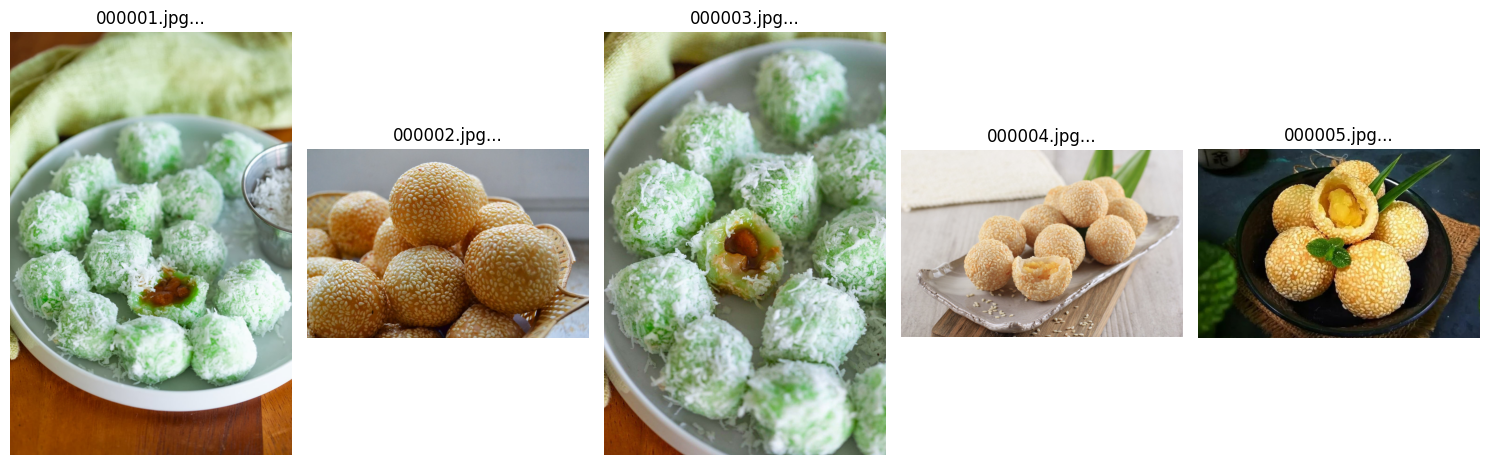

In [21]:
# Preview a few images
def preview_images(folder, n=5):
    images = sorted(
        [f for f in os.listdir(folder) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
    )
    if not images:
        logging.warning("No images found for preview.")
        return

    plt.figure(figsize=(15, 5))
    for i, img_file in enumerate(images[:n]):
        img_path = os.path.join(folder, img_file)
        try:
            img = Image.open(img_path)
            plt.subplot(1, n, i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"{img_file[:15]}...")
        except Exception as e:
            logging.error(f"Failed to load image {img_file}: {e}")
    plt.tight_layout()
    plt.show()

preview_images(output_dir)